In [1]:
# 패키지 불러오기
import pandas as pd # Pandas
import numpy as np # Numpy
import seaborn as sns # Seaborn
import matplotlib.pyplot as plt # Matplotlib.pyplot
%matplotlib inline
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation


# 한글 설정
from matplotlib import font_manager, rc   
plt.rcParams['axes.unicode_minus'] = False   # 그래프 한글 설정을 위해 matplotlib에서 rc 불러오기 (한글 깨짐 현상을 막아줌)

import platform
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"

# 경고표시 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기 
stock = pd.read_csv('datas/stock.adj_close.csv')
stock

,Symbol,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
1,A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
2,A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
3,A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
4,A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,...,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,8010.0,8010.0
2270,A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,...,4040.0,4050.0,4245.0,4275.0,4200.0,4195.0,4070.0,4045.0,4015.0,4055.0
2271,A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13200.0,13150.0,13100.0,13150.0,13100.0,13900.0,13250.0,13350.0,13550.0,13450.0
2272,A950190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32200.0,31200.0,30400.0,30500.0,30150.0,30050.0,31450.0,31750.0,31200.0,30350.0


- symbol : 종목 코드 - 발행체고유코드
- 2018-06-01 ~ 2020-09-18: 일별 해당 종목 주식 가격 (종가 기준)

In [3]:
# 종목 컬럼을 sum기준으로 groupby
df1 = stock.groupby('Symbol').sum()
df1

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,4040.0,4050.0,4245.0,4275.0,4200.0,4195.0,4070.0,4045.0,4015.0,4055.0
A950180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13200.0,13150.0,13100.0,13150.0,13100.0,13900.0,13250.0,13350.0,13550.0,13450.0


In [4]:
# groupby한 데이터를 행과 열을 바꾸기 (전치행렬)
df1 = df1.T
df1

Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,0.0,7690.0,4970.0,6530.0,38600.0,13850.0,0.0,0.0,0.0
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,0.0,7700.0,4900.0,6870.0,36400.0,14250.0,0.0,0.0,0.0
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,0.0,7690.0,4940.0,6690.0,36350.0,14450.0,0.0,0.0,0.0
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,0.0,7680.0,5140.0,6950.0,38700.0,14300.0,0.0,0.0,0.0
2018-06-08,11500.0,16600.0,3045.0,13800.0,20400.0,123500.0,20750.0,41956.0,154000.0,9510.0,...,3180.0,0.0,7680.0,5280.0,6740.0,40200.0,14150.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [5]:
# 데이터 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 2018-06-01 to 2020-09-18
Columns: 2274 entries, A000020 to A950200
dtypes: float64(2274)
memory usage: 9.9+ MB


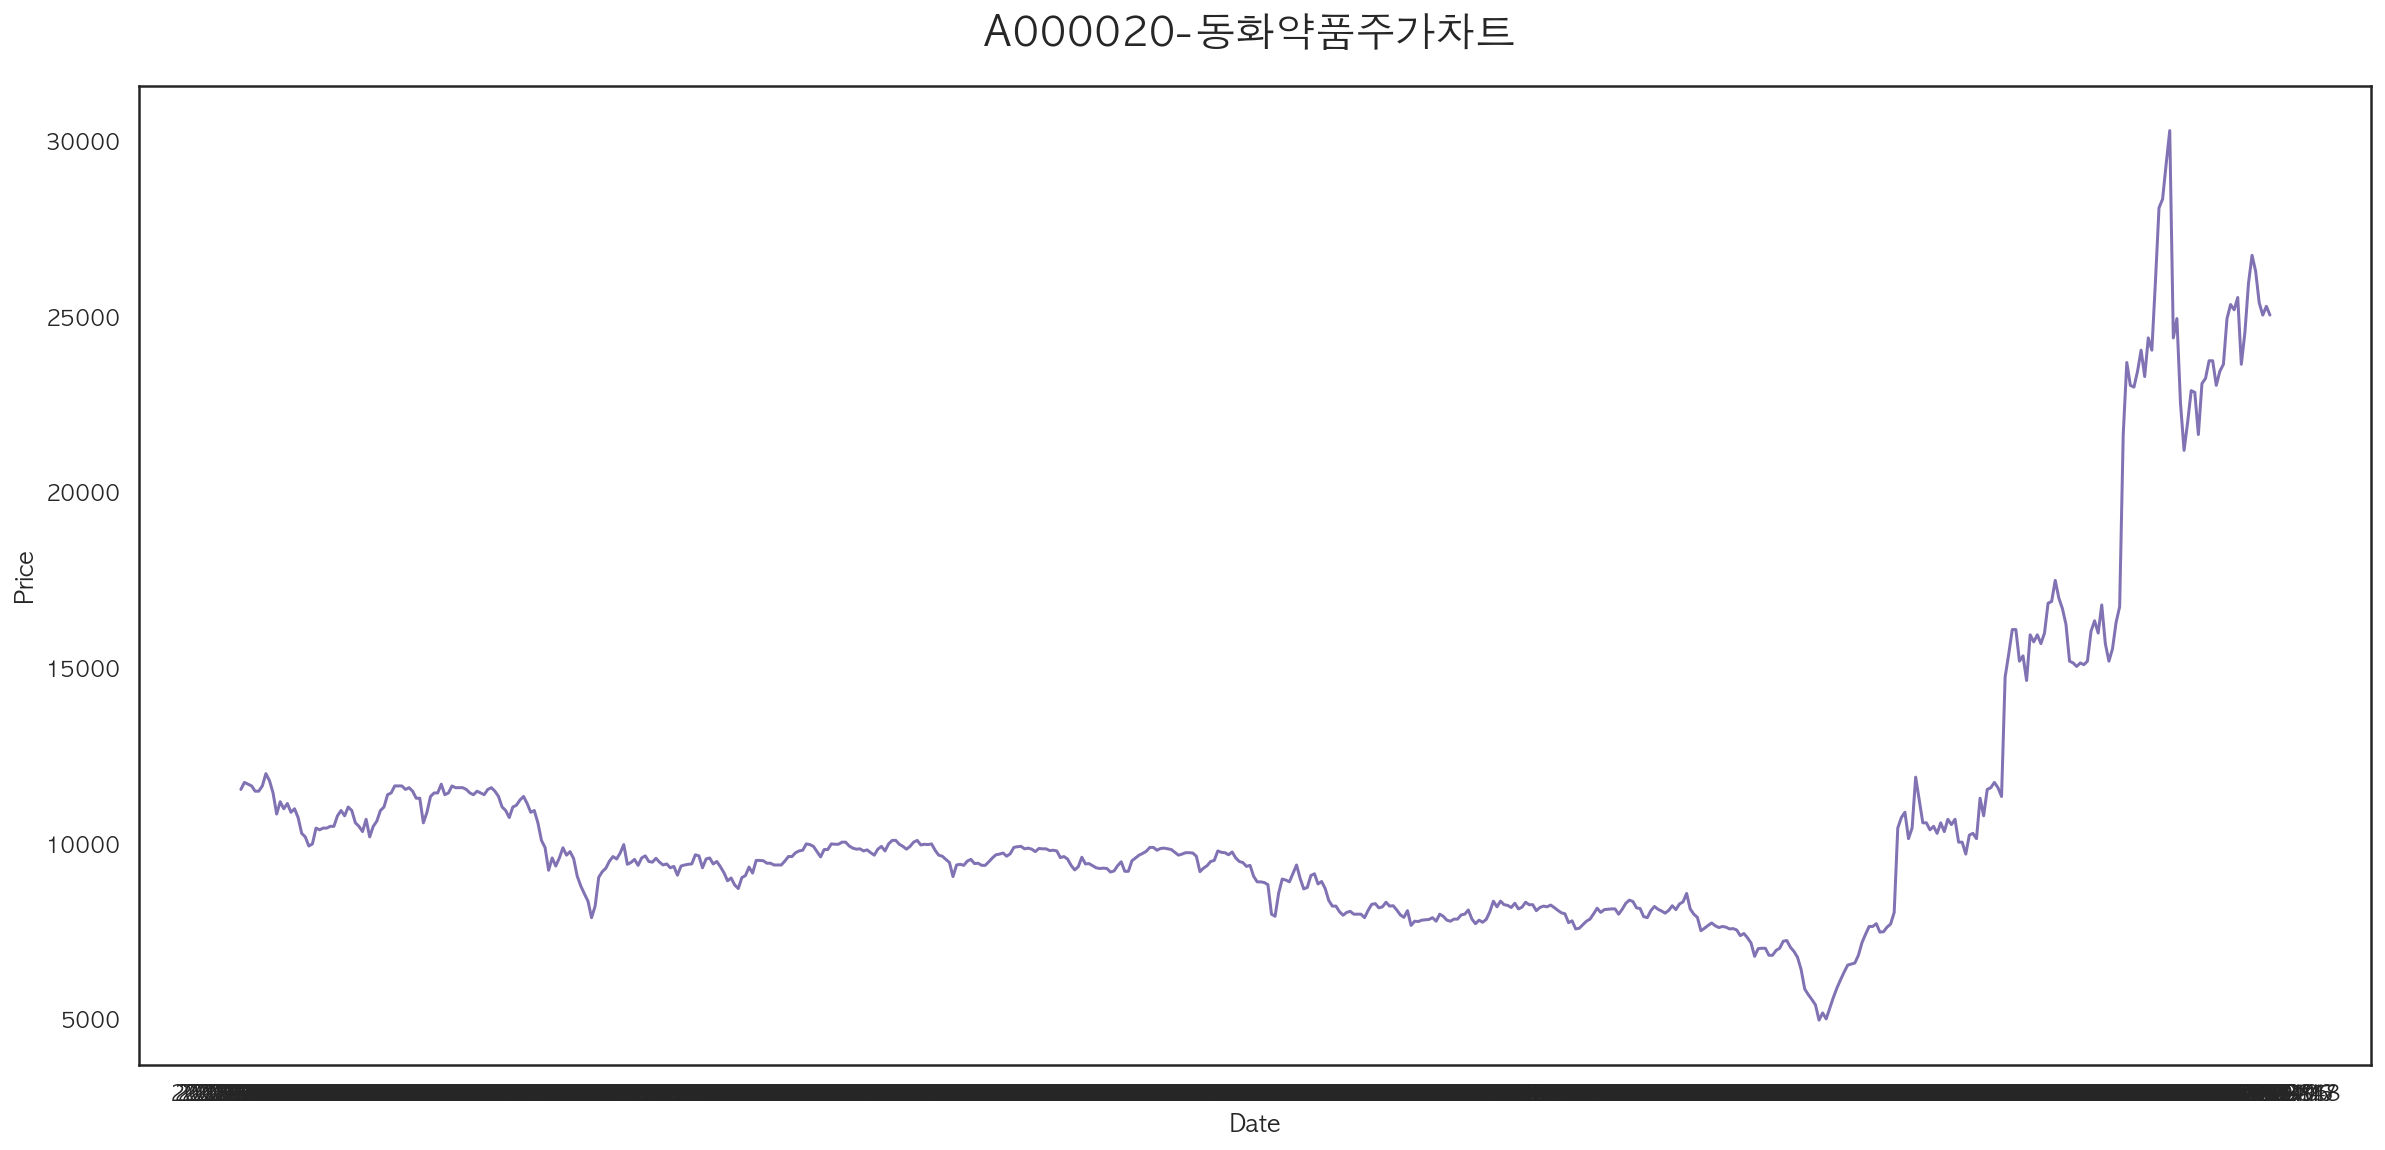

In [34]:
plt.figure(figsize=[20,9])
sns.lineplot(data=df1, x=df1.index, y="A000020", color=sns.color_palette()[4])
plt.title("A000020-동화약품주가차트 ", fontsize=20, pad=20);
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [47]:
small1 = df1['A000020'].min()
big1 = df1['A000020'].max()
print(small1, big1)

4985.0 30300.0


- 동화약품(종목코드: A000020)의 경우 그래프를 살펴보니 종가 기준 가장 낮은 가격이 2020-03-20일자 4,985 / 가장 높은가격이 2020-08-14일자 30,300 이었습니다.
- 낮은 가격 일자를 기준으로 공시 및 뉴스를 찾아보니 3월 16일 기준 3일전날의 종가보다 15%이상 하락하여 투자주의종목으로 지정되었었습니다.(아무래도 해당 건은 코로나 19가 사태가 커지면서 주식이 급락한 것 으로 보입니다.) 
- 그리고 2020년 4월 24일 주가가 급등하여 또 한번 투자주의종목으로 지정되었습니다.
- 그리고 2020년 8월 19일자 뉴스에서 동화약품이 코로나19 치료제 2상 임상시험을 신청하였고, 동물효능시험을 한 결과 유의미한 바이러스 억제 효능이 관찰 되었다는 뉴스가 보도 되면서 주가는 다시 급등하게 되었습니다. 

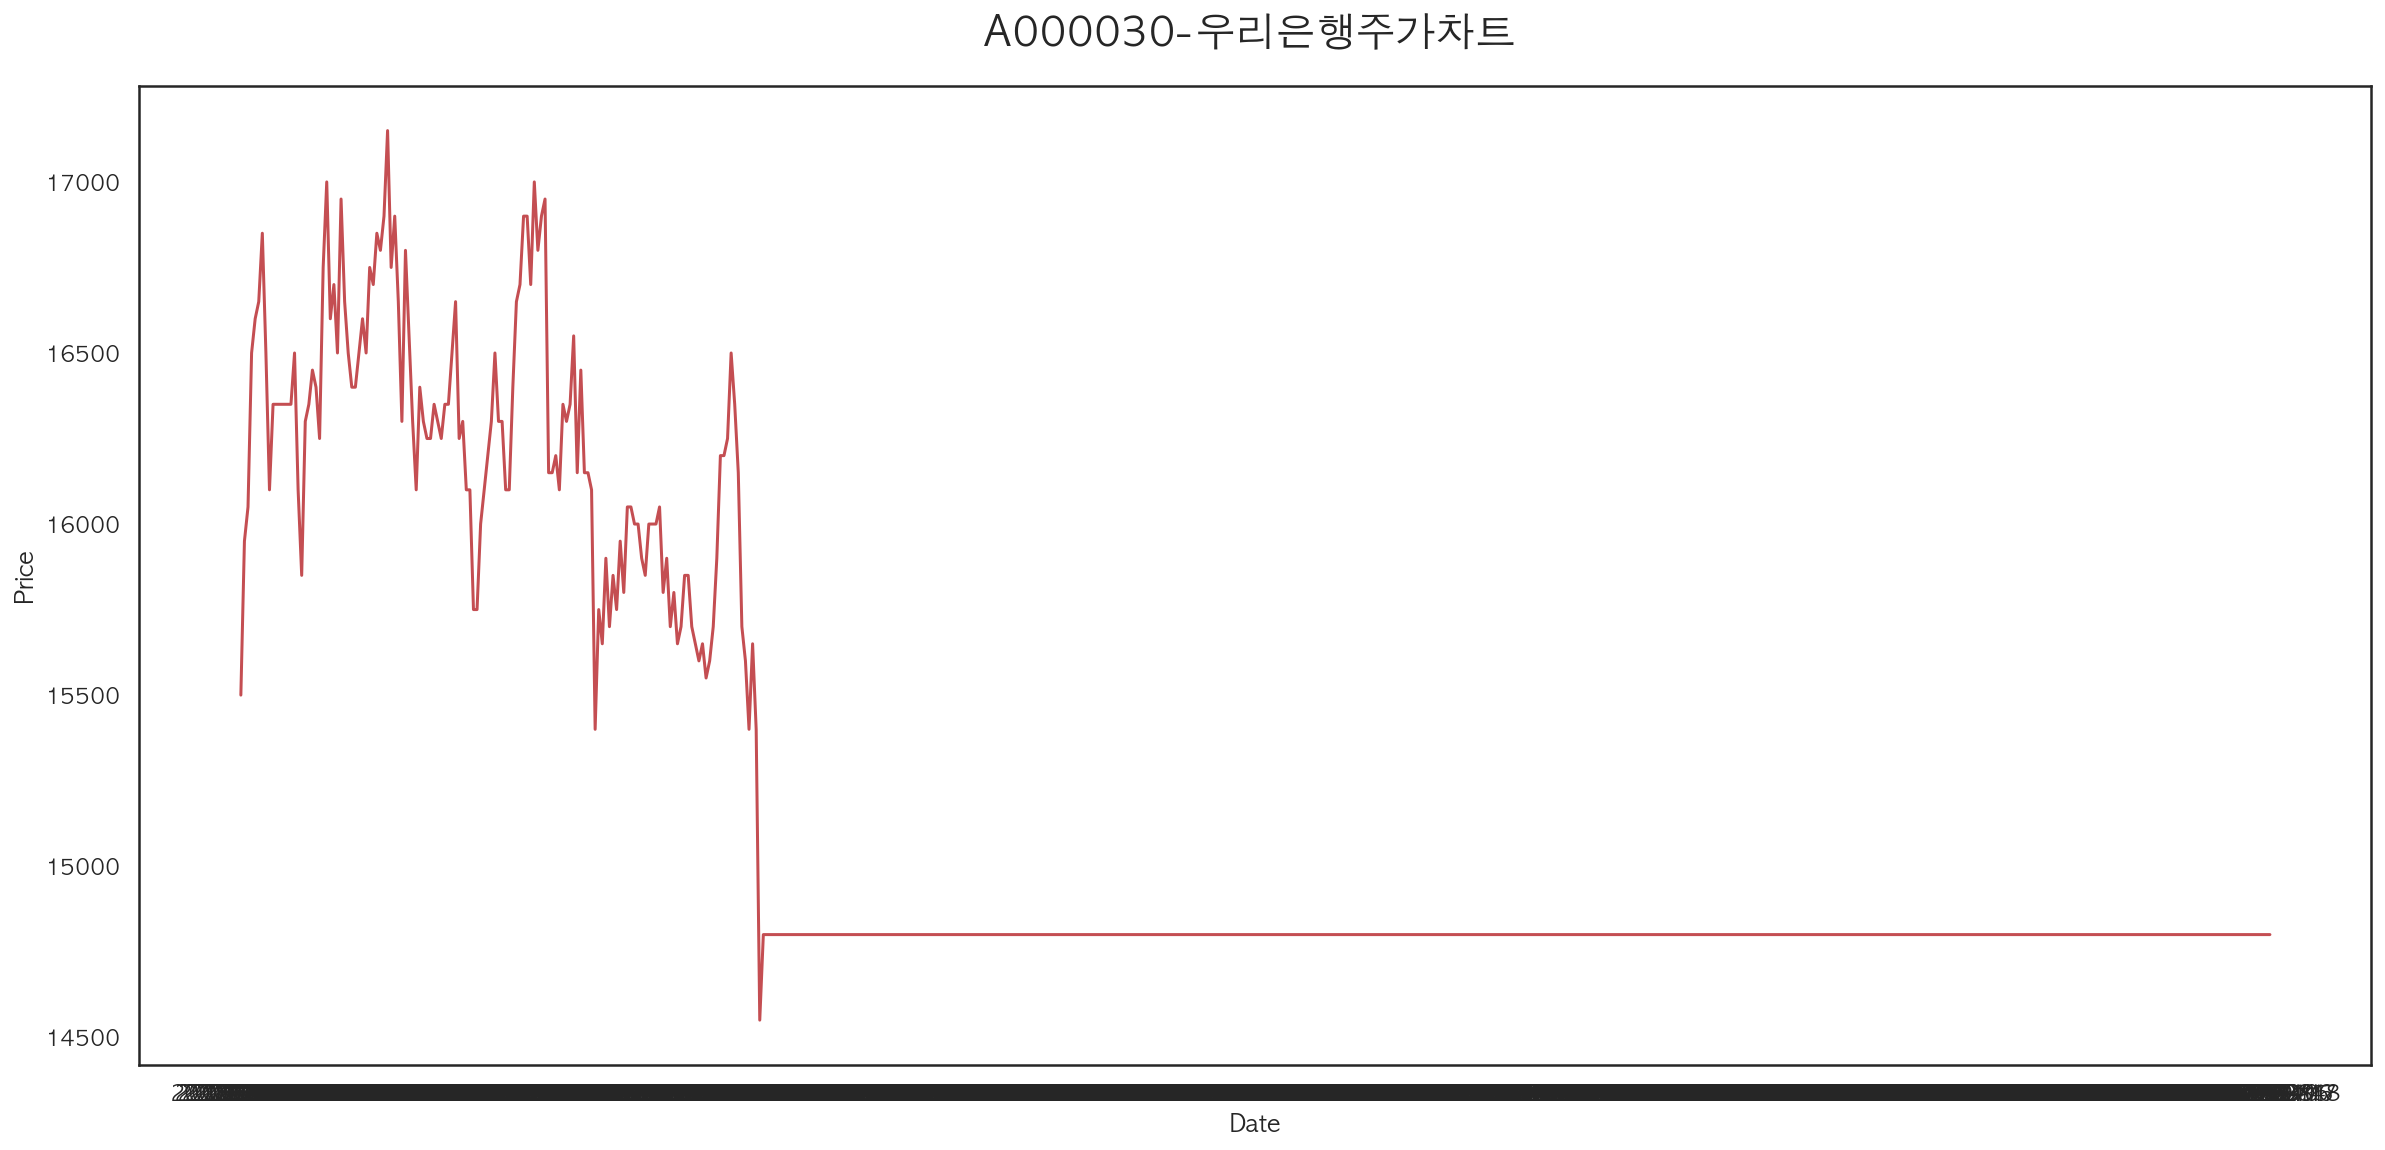

In [41]:
plt.figure(figsize=[20,9])
sns.lineplot(data=df1, x=df1.index, y="A000030", color=sns.color_palette()[3])
plt.title("A000030-우리은행주가차트 ", fontsize=20, pad=20);
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [49]:
small1 = df1['A000030'].min()
big1 = df1['A000030'].max()
print(small1, big1)

14550.0 17150.0


- 우리은행(종목코드: A000030)의 경우 그래프를 살펴보니 종가 기준 가장 낮은 가격이 2019-01-07일자 14,550 / 가장 높은가격이 2018-12-23일자 17,150 이었습니다.
- 해당 종목은 2019년 1월 8일부로 일정한 가격이 표시 된 것을 알 수 있습니다.
- 당시 우리금융지주로 종목 명을 바꾸게 되면서 우리은행은 거래정지 상태가 되었습니다. 

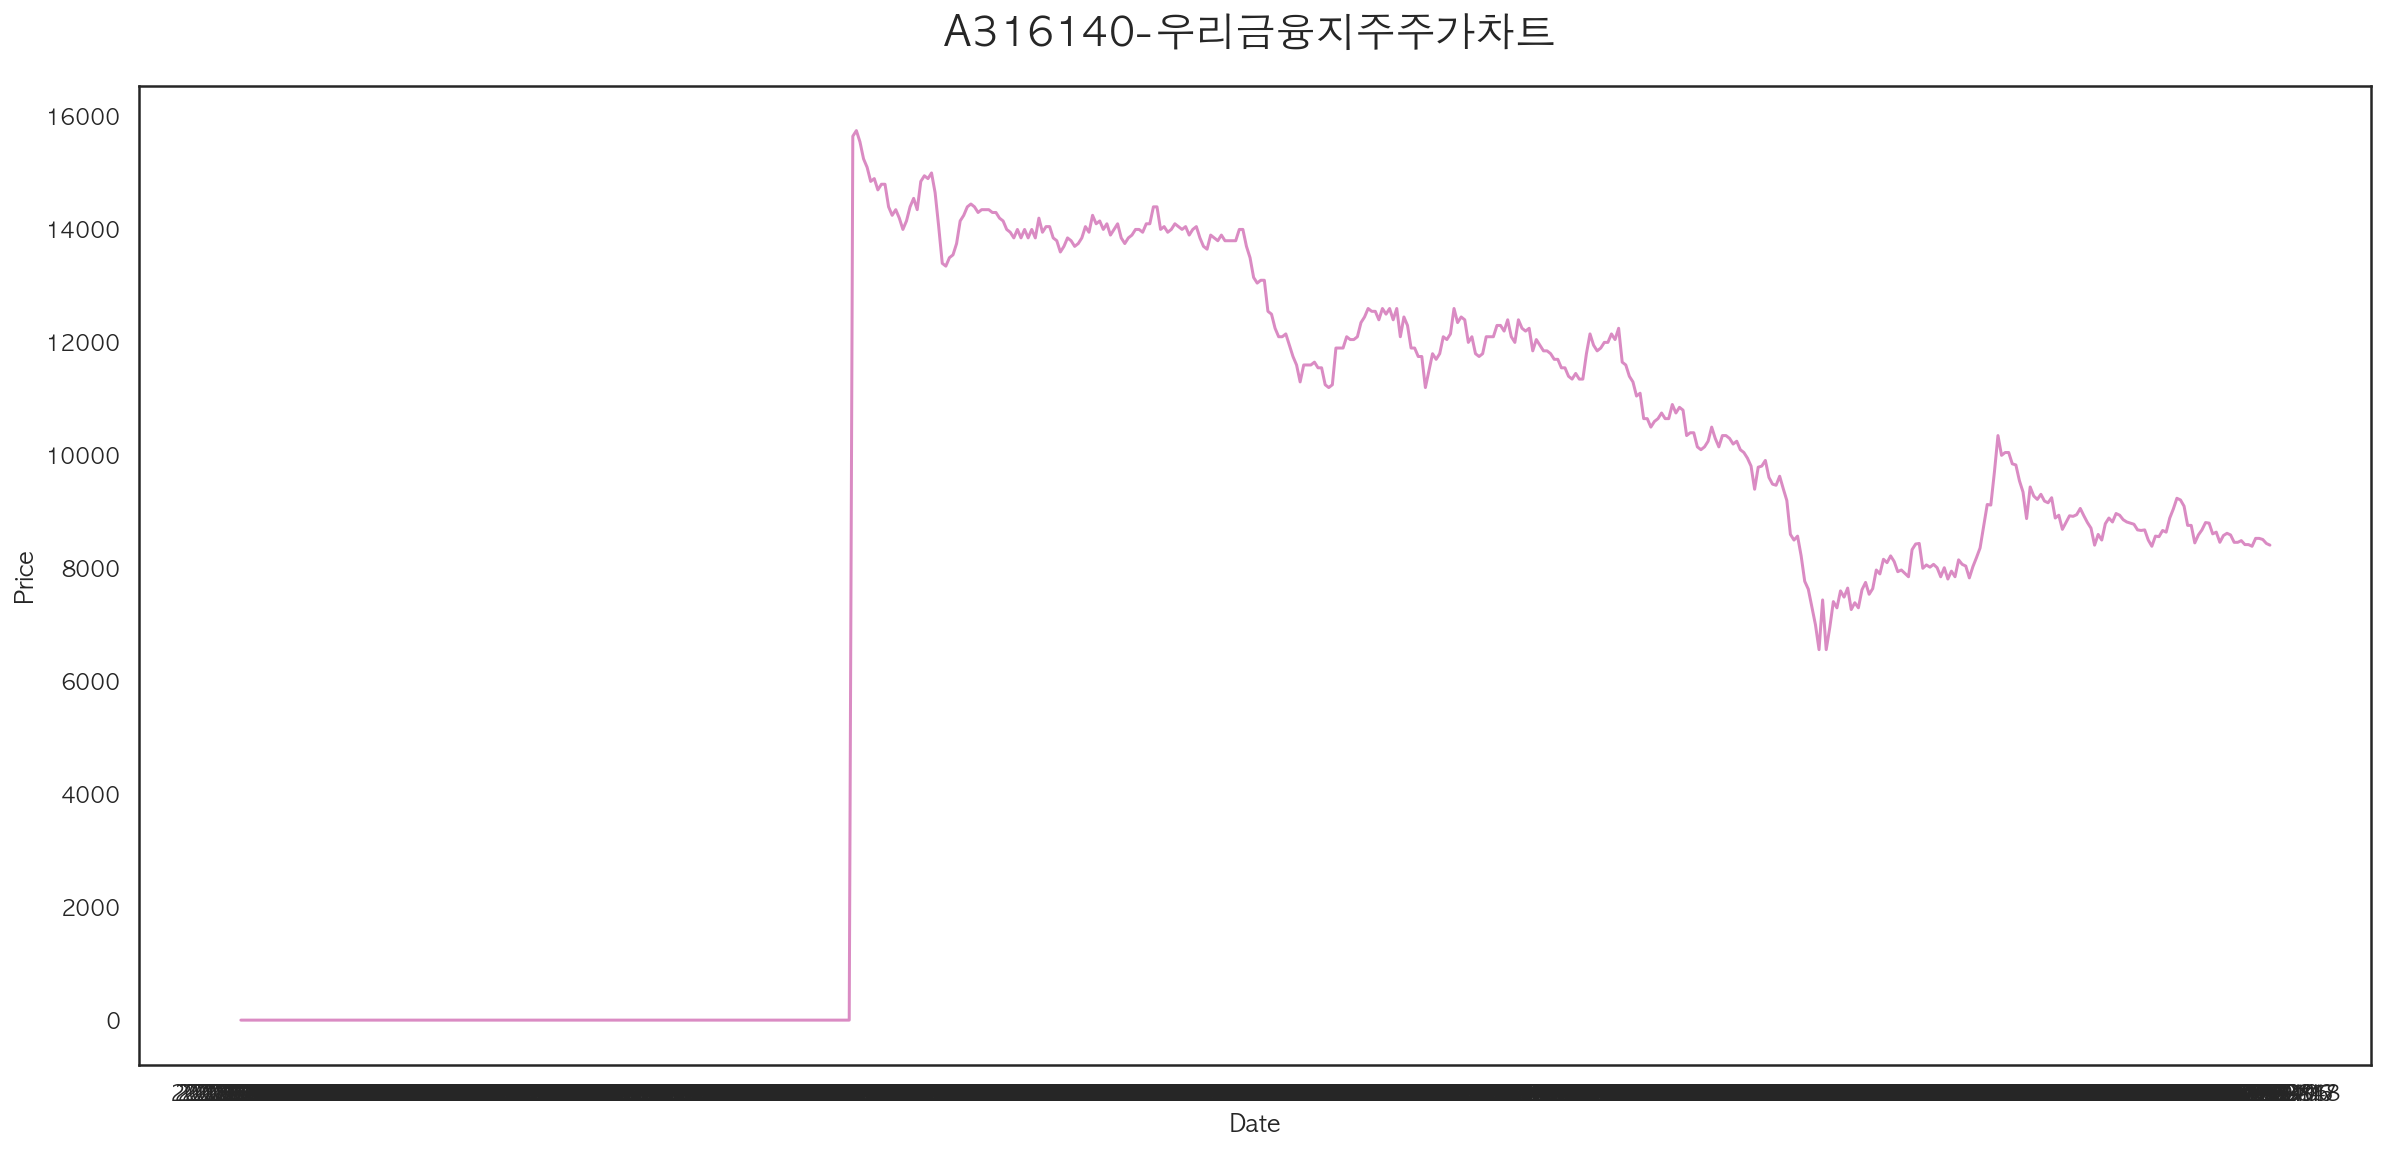

In [42]:
plt.figure(figsize=[20,9])
sns.lineplot(data=df1, x=df1.index, y="A316140", color=sns.color_palette()[6])
plt.title("A316140-우리금융지주주가차트 ", fontsize=20, pad=20);
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

- 그리고 종목이 2019년 02월 15일자로 우리금융지주(A316140)로 바뀌게 되었습니다. 
- 그래서 데이터는 2019년 02월 15일부터 시작합니다.
- 하지만 추세로 보아 상장하자마자 계속 떨어지는 모습이 보여집니다.
- 위 동화약품 때에도 비슷하게 3월 중순 코로나 19사태가 터지면서 주가가 최저점을 찍었습니다.

- 개선할점
    - 1. 각 종목별로 하나하나씩 데이터를 가져와서 보는 것이 불편함. 코드로 정리가 필요.
    - 2. 자료들을 찾는데 애먹음, 데이터에 맞게 정보를 얻는 방법이 아직은 부족, 공부가 더 필요함.
    - 3. 다양한 시각화 툴 사용 필요.
    - 4. 가설을 설정하지 않고, 바로 EDA 진행. 

- 처음 치뤄봤던 과제인데, 긴장하면서 진행했습니다. 부족하지만 잘 부탁드립니다.